# Session 3: Derivatives - Definition and Basic Rules

This notebook explores the formal definition of derivatives and the fundamental differentiation rules that form the foundation of calculus.

## Learning Objectives
- Master the formal definition of the derivative
- Apply basic differentiation rules: power rule, sum rule, difference rule
- Understand the constant rule and constant multiple rule
- Connect derivatives to rates of change and slopes

## Key Concepts

### Definition of the Derivative
The derivative of a function f(x) at point x is defined as:
$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

### Basic Differentiation Rules
1. **Constant Rule**: $\frac{d}{dx}[c] = 0$
2. **Power Rule**: $\frac{d}{dx}[x^n] = nx^{n-1}$
3. **Constant Multiple Rule**: $\frac{d}{dx}[cf(x)] = c\frac{d}{dx}[f(x)]$
4. **Sum Rule**: $\frac{d}{dx}[f(x) + g(x)] = f'(x) + g'(x)$
5. **Difference Rule**: $\frac{d}{dx}[f(x) - g(x)] = f'(x) - g'(x)$

### Notation
- $f'(x)$ or $\frac{df}{dx}$ or $\frac{d}{dx}[f(x)]$ all represent the derivative of f with respect to x

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, simplify, expand, limit, oo

# Demonstrate the definition of derivative using limit
def derivative_by_definition(f_expr, x_val, show_steps=True):
    """
    Calculate derivative using the formal definition f'(x) = lim[h→0] (f(x+h) - f(x))/h
    """
    x, h = symbols('x h')

    # Calculate f(x+h)
    f_x_plus_h = f_expr.subs(x, x + h)

    # Form the difference quotient
    difference_quotient = (f_x_plus_h - f_expr) / h

    if show_steps:
        print(f"Function: f(x) = {f_expr}")
        print(f"f(x+h) = {f_x_plus_h}")
        print(f"\nDifference quotient: [f(x+h) - f(x)] / h")
        print(f"= [{f_x_plus_h} - ({f_expr})] / h")
        print(f"= {expand(difference_quotient)}")

    # Calculate the limit as h approaches 0
    derivative = limit(difference_quotient, h, 0)

    if show_steps:
        print(f"\nTaking the limit as h → 0:")
        print(f"f'(x) = {derivative}")

        if x_val is not None:
            derivative_at_point = derivative.subs(x, x_val)
            print(f"\nAt x = {x_val}: f'({x_val}) = {derivative_at_point}")

    return derivative

# Examples using the definition
x = symbols('x')

print("EXAMPLE 1: f(x) = x²")
print("=" * 40)
f1 = x**2
derivative_by_definition(f1, 3)

print("\n" + "=" * 50 + "\n")

print("EXAMPLE 2: f(x) = 3x³ - 2x + 1")
print("=" * 40)
f2 = 3*x**3 - 2*x + 1
derivative_by_definition(f2, 1)

EXAMPLE 1: f(x) = x²
Function: f(x) = x**2
f(x+h) = (h + x)**2

Difference quotient: [f(x+h) - f(x)] / h
= [(h + x)**2 - (x**2)] / h
= h + 2*x

Taking the limit as h → 0:
f'(x) = 2*x

At x = 3: f'(3) = 6


EXAMPLE 2: f(x) = 3x³ - 2x + 1
Function: f(x) = 3*x**3 - 2*x + 1
f(x+h) = -2*h - 2*x + 3*(h + x)**3 + 1

Difference quotient: [f(x+h) - f(x)] / h
= [-2*h - 2*x + 3*(h + x)**3 + 1 - (3*x**3 - 2*x + 1)] / h
= 3*h**2 + 9*h*x + 9*x**2 - 2

Taking the limit as h → 0:
f'(x) = 9*x**2 - 2

At x = 1: f'(1) = 7


9*x**2 - 2

In [2]:
# Demonstrate basic differentiation rules using SymPy
def demonstrate_rules():
    """Show the basic differentiation rules with examples"""

    x = symbols('x')

    print("BASIC DIFFERENTIATION RULES")
    print("=" * 50)

    # 1. Constant Rule
    print("\n1. CONSTANT RULE: d/dx[c] = 0")
    print("-" * 30)
    constants = [5, -3, sp.pi, sp.E]
    for c in constants:
        derivative = diff(c, x)
        print(f"d/dx[{c}] = {derivative}")

    # 2. Power Rule
    print("\n2. POWER RULE: d/dx[xⁿ] = nxⁿ⁻¹")
    print("-" * 30)
    powers = [1, 2, 3, 4, sp.Rational(1,2), -1, -2]
    for n in powers:
        f = x**n
        derivative = diff(f, x)
        print(f"d/dx[x^{n}] = {derivative}")

    # 3. Constant Multiple Rule
    print("\n3. CONSTANT MULTIPLE RULE: d/dx[c·f(x)] = c·f'(x)")
    print("-" * 30)
    examples = [(3, x**2), (-2, x**3), (sp.pi, x**4), (sp.Rational(1,2), x**5)]
    for c, f in examples:
        cf = c * f
        derivative = diff(cf, x)
        print(f"d/dx[{cf}] = {derivative}")

    # 4. Sum and Difference Rules
    print("\n4. SUM/DIFFERENCE RULES: d/dx[f(x) ± g(x)] = f'(x) ± g'(x)")
    print("-" * 30)

    # Sum examples
    sum_examples = [
        x**2 + x**3,
        x**4 + 2*x**2 + 1,
        3*x**5 + 4*x**3 - 2*x + 7
    ]

    for f in sum_examples:
        derivative = diff(f, x)
        print(f"d/dx[{f}] = {derivative}")

    # Show step-by-step for a complex example
    print("\n5. COMPLEX EXAMPLE - STEP BY STEP")
    print("-" * 30)
    complex_f = 4*x**3 - 6*x**2 + 2*x - 9
    print(f"f(x) = {complex_f}")

    # Break down by terms
    terms = [4*x**3, -6*x**2, 2*x, -9]
    derivatives = []

    for term in terms:
        term_derivative = diff(term, x)
        derivatives.append(term_derivative)
        print(f"d/dx[{term}] = {term_derivative}")

    total_derivative = sum(derivatives)
    print(f"\nCombining all terms:")
    print(f"f'(x) = {' + '.join(map(str, derivatives))} = {total_derivative}")

    # Verify with direct calculation
    direct_derivative = diff(complex_f, x)
    print(f"Verification: d/dx[{complex_f}] = {direct_derivative}")

demonstrate_rules()

BASIC DIFFERENTIATION RULES

1. CONSTANT RULE: d/dx[c] = 0
------------------------------
d/dx[5] = 0
d/dx[-3] = 0
d/dx[pi] = 0
d/dx[E] = 0

2. POWER RULE: d/dx[xⁿ] = nxⁿ⁻¹
------------------------------
d/dx[x^1] = 1
d/dx[x^2] = 2*x
d/dx[x^3] = 3*x**2
d/dx[x^4] = 4*x**3
d/dx[x^1/2] = 1/(2*sqrt(x))
d/dx[x^-1] = -1/x**2
d/dx[x^-2] = -2/x**3

3. CONSTANT MULTIPLE RULE: d/dx[c·f(x)] = c·f'(x)
------------------------------
d/dx[3*x**2] = 6*x
d/dx[-2*x**3] = -6*x**2
d/dx[pi*x**4] = 4*pi*x**3
d/dx[x**5/2] = 5*x**4/2

4. SUM/DIFFERENCE RULES: d/dx[f(x) ± g(x)] = f'(x) ± g'(x)
------------------------------
d/dx[x**3 + x**2] = 3*x**2 + 2*x
d/dx[x**4 + 2*x**2 + 1] = 4*x**3 + 4*x
d/dx[3*x**5 + 4*x**3 - 2*x + 7] = 15*x**4 + 12*x**2 - 2

5. COMPLEX EXAMPLE - STEP BY STEP
------------------------------
f(x) = 4*x**3 - 6*x**2 + 2*x - 9
d/dx[4*x**3] = 12*x**2
d/dx[-6*x**2] = -12*x
d/dx[2*x] = 2
d/dx[-9] = 0

Combining all terms:
f'(x) = 12*x**2 + -12*x + 2 + 0 = 12*x**2 - 12*x + 2
Verification: d/dx

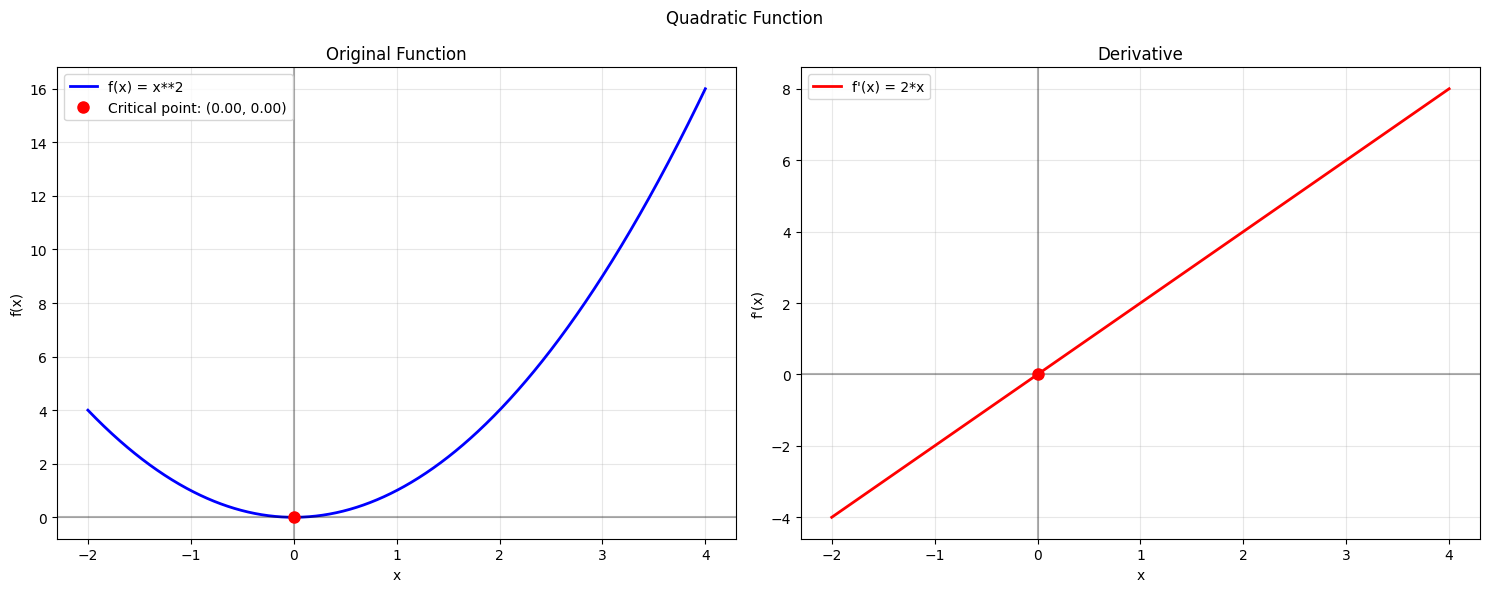

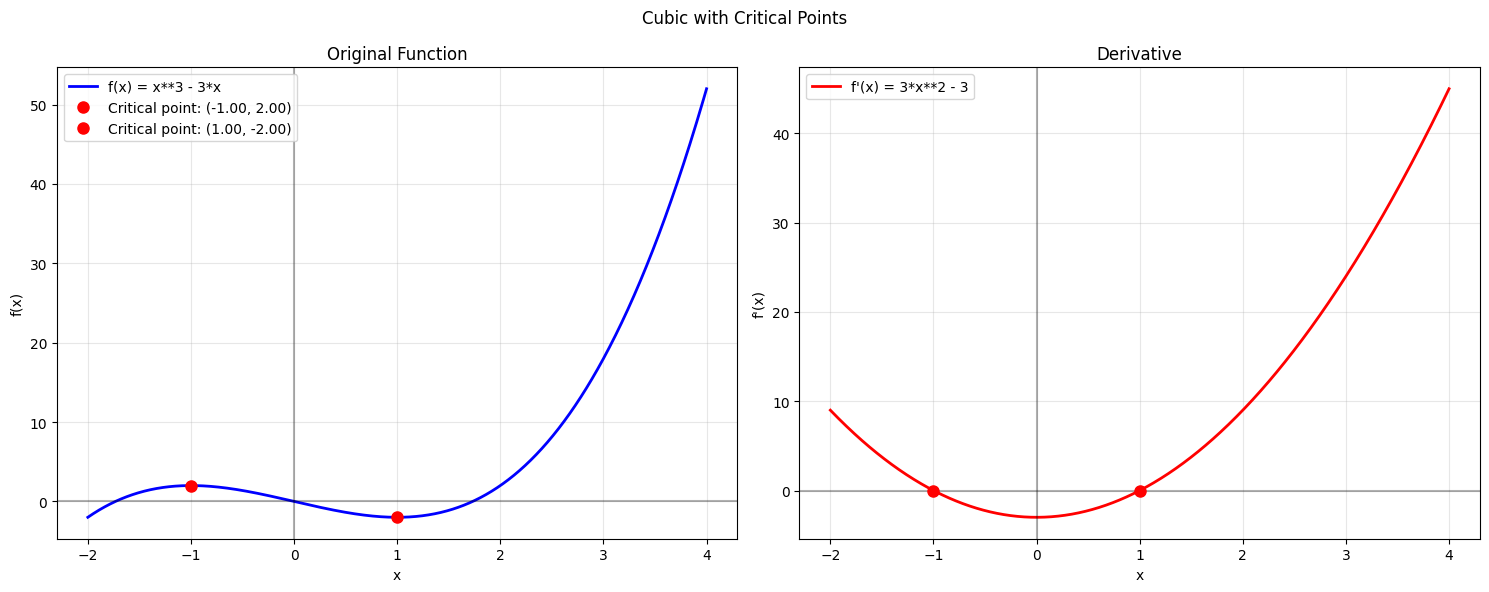

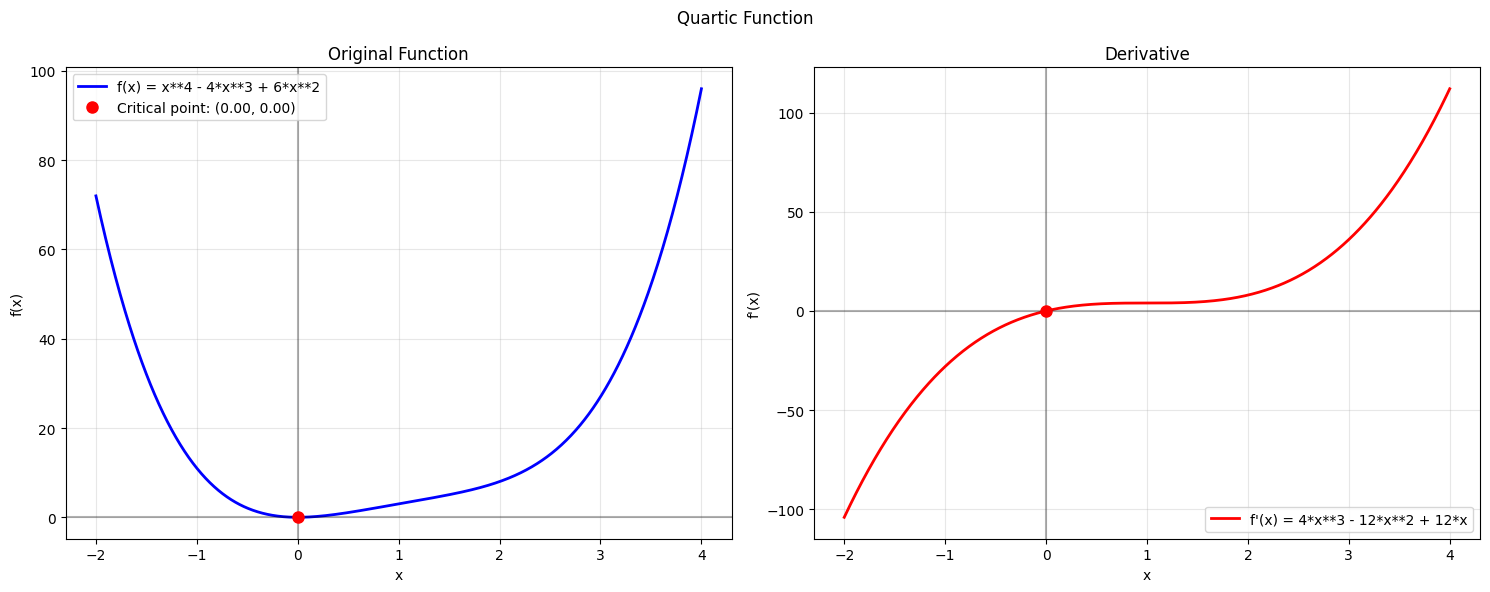

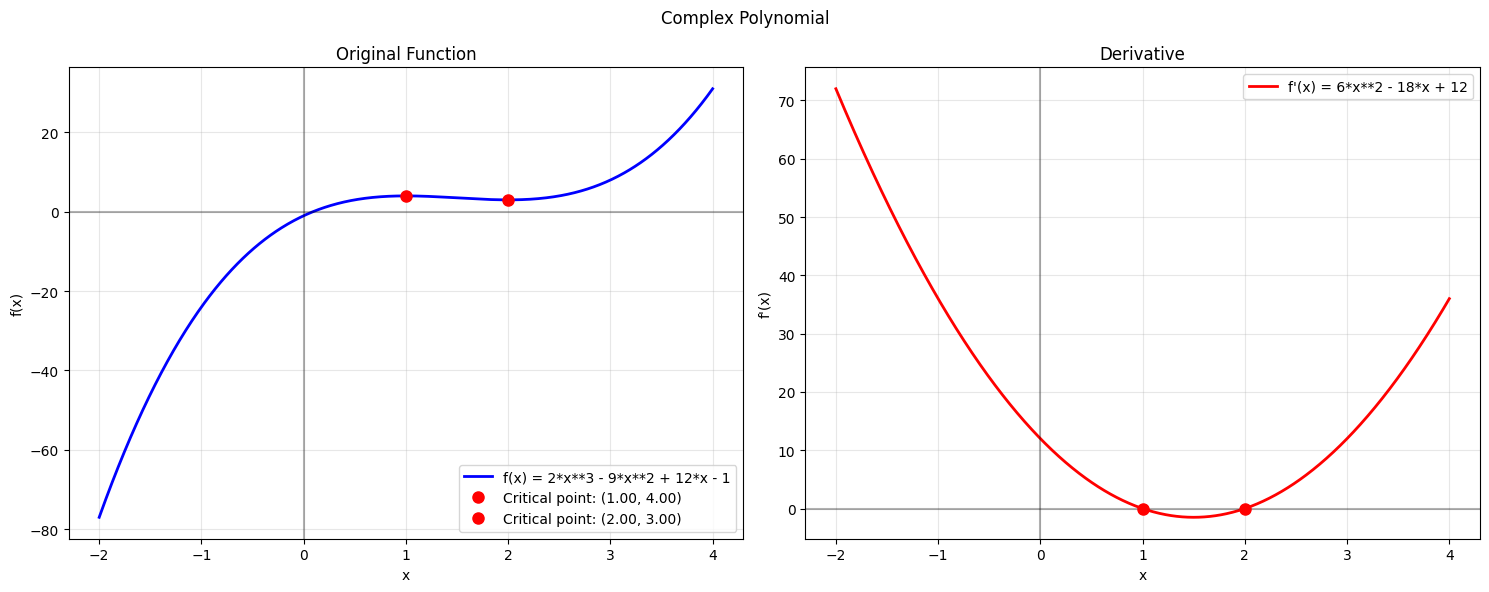

In [3]:
# Visualize functions and their derivatives
def plot_function_and_derivative(f_expr, x_range=(-3, 3), title="Function and its Derivative"):
    """Plot a function and its derivative side by side"""

    x = symbols('x')

    # Calculate derivative
    f_prime = diff(f_expr, x)

    # Convert to numerical functions
    f_numeric = sp.lambdify(x, f_expr, 'numpy')
    f_prime_numeric = sp.lambdify(x, f_prime, 'numpy')

    # Create x values
    x_vals = np.linspace(x_range[0], x_range[1], 1000)

    # Calculate y values
    try:
        y_vals = f_numeric(x_vals)
        y_prime_vals = f_prime_numeric(x_vals)

        # Create plots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot original function
        ax1.plot(x_vals, y_vals, 'b-', linewidth=2, label=f'f(x) = {f_expr}')
        ax1.set_xlabel('x')
        ax1.set_ylabel('f(x)')
        ax1.set_title(f'Original Function')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

        # Plot derivative
        ax2.plot(x_vals, y_prime_vals, 'r-', linewidth=2, label=f"f'(x) = {f_prime}")
        ax2.set_xlabel('x')
        ax2.set_ylabel("f'(x)")
        ax2.set_title('Derivative')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

        # Mark critical points (where derivative is zero)
        critical_points = sp.solve(f_prime, x)
        for cp in critical_points:
            if cp.is_real and x_range[0] <= float(cp) <= x_range[1]:
                cp_val = float(cp)
                f_val = float(f_expr.subs(x, cp))
                ax1.plot(cp_val, f_val, 'ro', markersize=8,
                        label=f'Critical point: ({cp_val:.2f}, {f_val:.2f})')
                ax2.plot(cp_val, 0, 'ro', markersize=8)

        ax1.legend()
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error plotting: {e}")
        print(f"Function: {f_expr}")
        print(f"Derivative: {f_prime}")

# Examples of functions and their derivatives
x = symbols('x')

examples = [
    (x**2, "Quadratic Function"),
    (x**3 - 3*x, "Cubic with Critical Points"),
    (x**4 - 4*x**3 + 6*x**2, "Quartic Function"),
    (2*x**3 - 9*x**2 + 12*x - 1, "Complex Polynomial")
]

for func, title in examples:
    plot_function_and_derivative(func, (-2, 4), title)

Function: f(x) = x**3 - 3*x**2 + 2*x + 1
Derivative: f'(x) = 3*x**2 - 6*x + 2


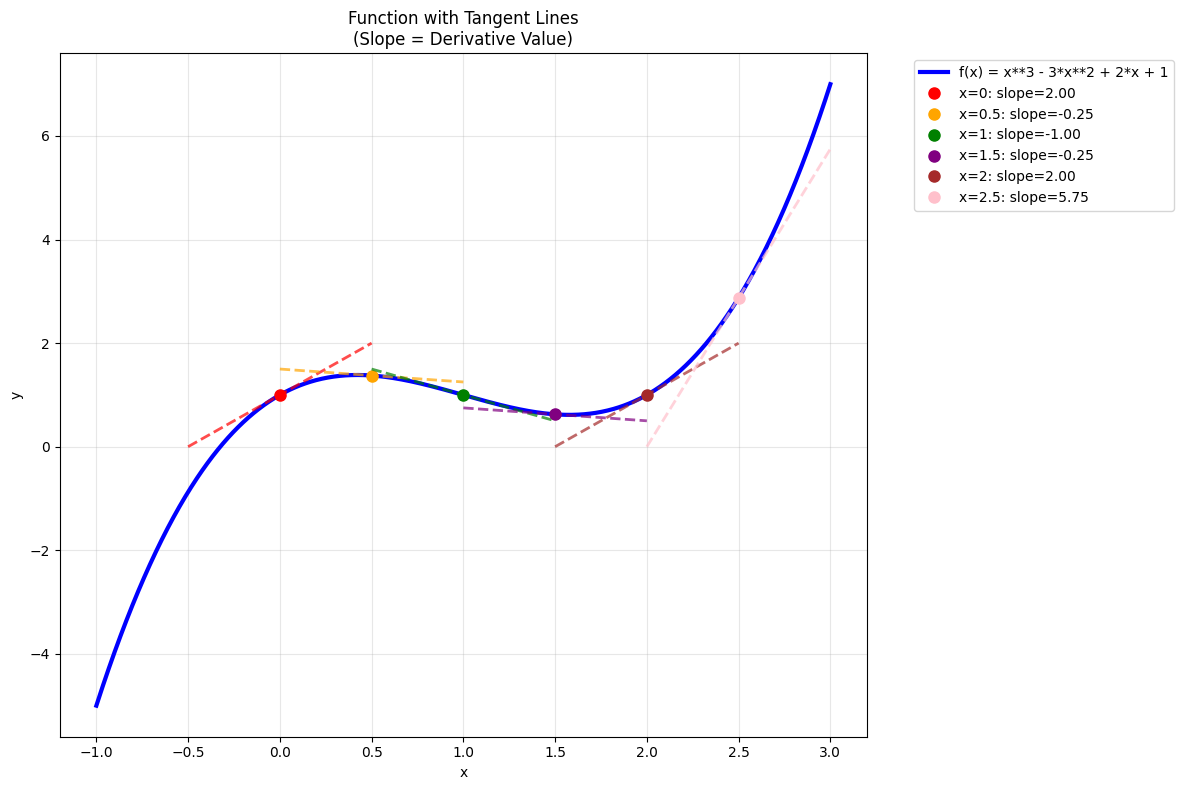


Table of Values:
x		f(x)		f'(x) (slope)
----------------------------------------
0.0		1.000		2.000
0.5		1.375		-0.250
1.0		1.000		-1.000
1.5		0.625		-0.250
2.0		1.000		2.000
2.5		2.875		5.750


In [4]:
# Interactive demonstration: slope of tangent lines
def demonstrate_tangent_slopes():
    """Show how derivative gives slope of tangent line at any point"""

    x = symbols('x')
    f = x**3 - 3*x**2 + 2*x + 1  # Example function
    f_prime = diff(f, x)

    print(f"Function: f(x) = {f}")
    print(f"Derivative: f'(x) = {f_prime}")

    # Convert to numerical functions
    f_numeric = sp.lambdify(x, f, 'numpy')
    f_prime_numeric = sp.lambdify(x, f_prime, 'numpy')

    # Plot function
    x_vals = np.linspace(-1, 3, 1000)
    y_vals = f_numeric(x_vals)

    plt.figure(figsize=(12, 8))
    plt.plot(x_vals, y_vals, 'b-', linewidth=3, label=f'f(x) = {f}')

    # Show tangent lines at several points
    test_points = [0, 0.5, 1, 1.5, 2, 2.5]
    colors = ['red', 'orange', 'green', 'purple', 'brown', 'pink']

    for i, x_pt in enumerate(test_points):
        # Point on curve
        y_pt = f_numeric(x_pt)
        slope = f_prime_numeric(x_pt)

        # Plot point
        plt.plot(x_pt, y_pt, 'o', color=colors[i], markersize=8,
                label=f'x={x_pt}: slope={slope:.2f}')

        # Plot tangent line
        dx = 0.5
        x_tangent = np.array([x_pt - dx, x_pt + dx])
        y_tangent = y_pt + slope * (x_tangent - x_pt)

        plt.plot(x_tangent, y_tangent, '--', color=colors[i],
                linewidth=2, alpha=0.7)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function with Tangent Lines\n(Slope = Derivative Value)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Create a table of values
    print("\nTable of Values:")
    print("x\t\tf(x)\t\tf'(x) (slope)")
    print("-" * 40)

    for x_pt in test_points:
        y_pt = f_numeric(x_pt)
        slope = f_prime_numeric(x_pt)
        print(f"{x_pt:.1f}\t\t{y_pt:.3f}\t\t{slope:.3f}")

demonstrate_tangent_slopes()

In [6]:
import sympy as sp
from sympy import symbols, diff

def practice_problems():
    """Solve practice problems step by step"""

    x = symbols('x')

    problems = [
        ("Simple polynomial", 3*x**2 + 5*x - 7),
        ("Higher degree", x**5 - 2*x**4 + 3*x**3 - x**2 + 4),
        ("Fractional powers", x**(sp.Rational(3,2)) + 2*x**(sp.Rational(1,2))),
        ("Negative powers", 4*x**(-2) + 3*x**(-1) + 2),
        ("Mixed terms", 2*x**3 - sp.sqrt(x) + 1/x + sp.pi)
    ]

    print("PRACTICE PROBLEMS - STEP BY STEP SOLUTIONS")
    print("=" * 50)

    for i, (description, f) in enumerate(problems, 1):
        print(f"\nPROBLEM {i}: {description}")
        print("-" * 30)
        print(f"Find the derivative of f(x) = {f}")

        # Calculate derivative
        f_prime = diff(f, x)

        print(f"\nSolution:")

        # Break down by terms if it's a sum
        if f.is_Add:
            print("Applying sum/difference rule:")
            for j, term in enumerate(f.args):
                term_derivative = diff(term, x)
                print(f"  d/dx[{term}] = {term_derivative}")
            print(f"\nCombining: f'(x) = {f_prime}")
        else:
            print(f"f'(x) = {f_prime}")

        # Evaluate at x = 1 for numerical example
        try:
            value_at_1 = f.subs(x, 1)
            derivative_at_1 = f_prime.subs(x, 1)
            print(f"\nAt x = 1: f(1) = {value_at_1}, f'(1) = {derivative_at_1}")
        except:
            pass

        print()

practice_problems()


PRACTICE PROBLEMS - STEP BY STEP SOLUTIONS

PROBLEM 1: Simple polynomial
------------------------------
Find the derivative of f(x) = 3*x**2 + 5*x - 7

Solution:
Applying sum/difference rule:
  d/dx[-7] = 0
  d/dx[3*x**2] = 6*x
  d/dx[5*x] = 5

Combining: f'(x) = 6*x + 5

At x = 1: f(1) = 1, f'(1) = 11


PROBLEM 2: Higher degree
------------------------------
Find the derivative of f(x) = x**5 - 2*x**4 + 3*x**3 - x**2 + 4

Solution:
Applying sum/difference rule:
  d/dx[4] = 0
  d/dx[x**5] = 5*x**4
  d/dx[-x**2] = -2*x
  d/dx[-2*x**4] = -8*x**3
  d/dx[3*x**3] = 9*x**2

Combining: f'(x) = 5*x**4 - 8*x**3 + 9*x**2 - 2*x

At x = 1: f(1) = 5, f'(1) = 4


PROBLEM 3: Fractional powers
------------------------------
Find the derivative of f(x) = x**(3/2) + 2*sqrt(x)

Solution:
Applying sum/difference rule:
  d/dx[x**(3/2)] = 3*sqrt(x)/2
  d/dx[2*sqrt(x)] = 1/sqrt(x)

Combining: f'(x) = 3*sqrt(x)/2 + 1/sqrt(x)

At x = 1: f(1) = 3, f'(1) = 5/2


PROBLEM 4: Negative powers
-----------------------

MOTION APPLICATIONS

Example 1: Position function s(t) = t³ - 6t² + 9t + 2
--------------------------------------------------
Position: s(t) = t**3 - 6*t**2 + 9*t + 2
Velocity: v(t) = s'(t) = 3*t**2 - 12*t + 9
Acceleration: a(t) = v'(t) = s''(t) = 6*t - 12

Velocity equals zero when: t = [1, 3]
Acceleration equals zero when: t = [2]


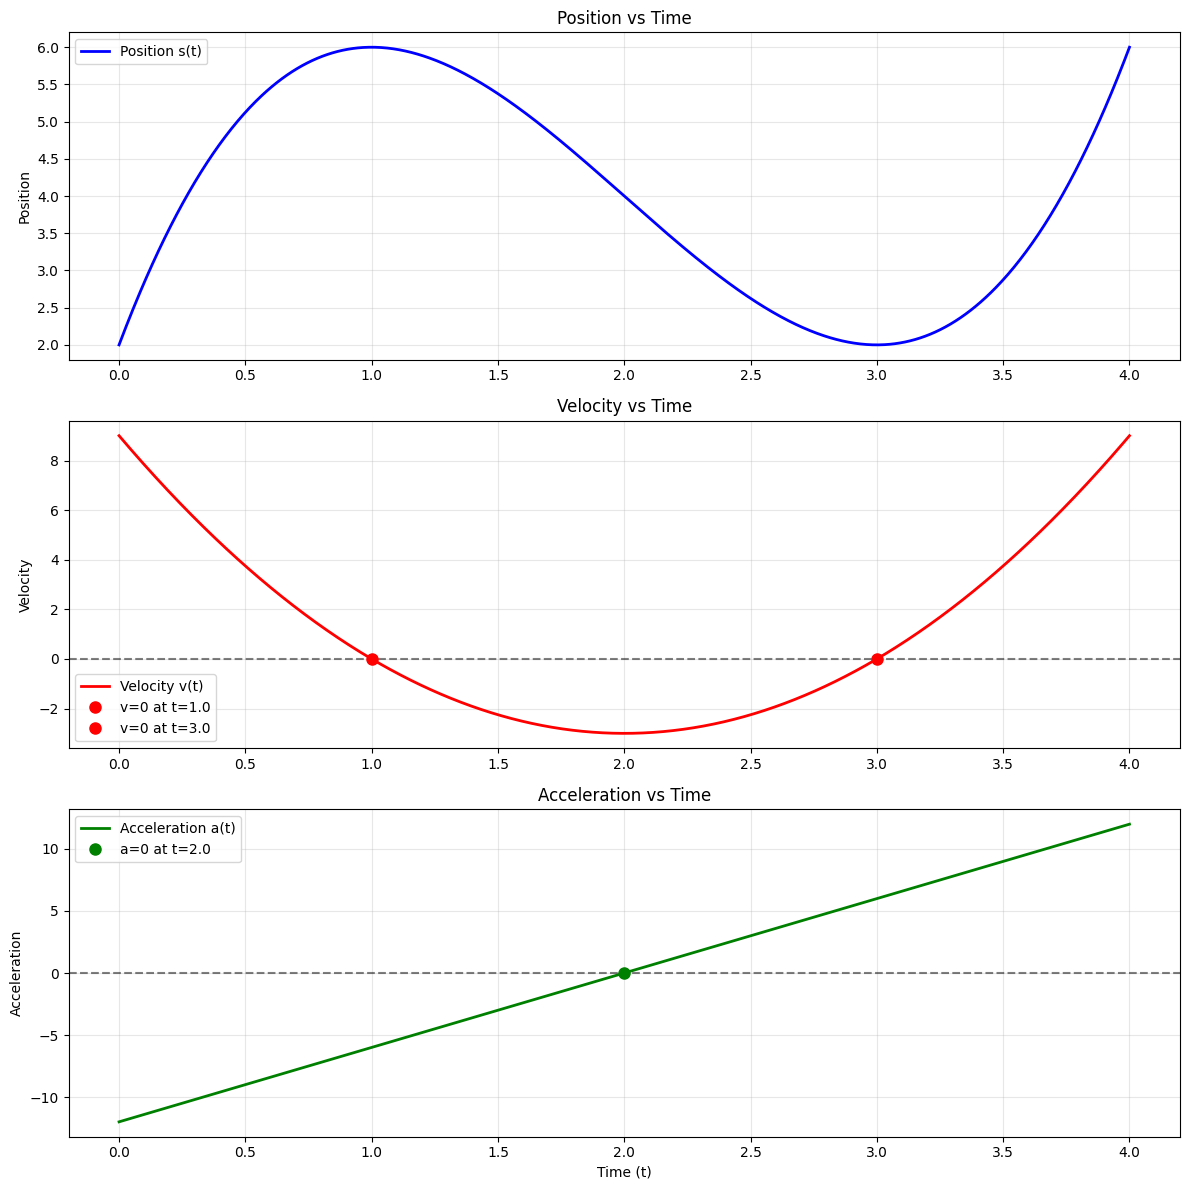


Analysis at specific times:
t	Position	Velocity	Acceleration
---------------------------------------------
0	    2.00	    9.00	  -12.00
1	    6.00	    0.00	   -6.00
2	    4.00	   -3.00	    0.00
3	    2.00	    0.00	    6.00
4	    6.00	    9.00	   12.00


In [7]:
# Application: Motion problems using derivatives
def motion_applications():
    """Apply derivatives to position, velocity, and acceleration problems"""

    t = symbols('t')

    print("MOTION APPLICATIONS")
    print("=" * 30)

    # Example 1: Object moving along a line
    print("\nExample 1: Position function s(t) = t³ - 6t² + 9t + 2")
    print("-" * 50)

    s = t**3 - 6*t**2 + 9*t + 2  # position
    v = diff(s, t)  # velocity (first derivative)
    a = diff(v, t)  # acceleration (second derivative)

    print(f"Position: s(t) = {s}")
    print(f"Velocity: v(t) = s'(t) = {v}")
    print(f"Acceleration: a(t) = v'(t) = s''(t) = {a}")

    # Find when velocity is zero (object changes direction)
    velocity_zeros = sp.solve(v, t)
    print(f"\nVelocity equals zero when: t = {velocity_zeros}")

    # Find when acceleration is zero
    acceleration_zeros = sp.solve(a, t)
    print(f"Acceleration equals zero when: t = {acceleration_zeros}")

    # Plot position, velocity, and acceleration
    t_vals = np.linspace(0, 4, 1000)
    s_numeric = sp.lambdify(t, s, 'numpy')
    v_numeric = sp.lambdify(t, v, 'numpy')
    a_numeric = sp.lambdify(t, a, 'numpy')

    s_vals = s_numeric(t_vals)
    v_vals = v_numeric(t_vals)
    a_vals = a_numeric(t_vals)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

    # Position plot
    ax1.plot(t_vals, s_vals, 'b-', linewidth=2, label='Position s(t)')
    ax1.set_ylabel('Position')
    ax1.set_title('Position vs Time')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Velocity plot
    ax2.plot(t_vals, v_vals, 'r-', linewidth=2, label='Velocity v(t)')
    ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)

    # Mark velocity zeros
    for zero in velocity_zeros:
        if zero.is_real and 0 <= float(zero) <= 4:
            ax2.plot(float(zero), 0, 'ro', markersize=8,
                    label=f'v=0 at t={float(zero):.1f}')

    ax2.set_ylabel('Velocity')
    ax2.set_title('Velocity vs Time')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # Acceleration plot
    ax3.plot(t_vals, a_vals, 'g-', linewidth=2, label='Acceleration a(t)')
    ax3.axhline(y=0, color='k', linestyle='--', alpha=0.5)

    # Mark acceleration zeros
    for zero in acceleration_zeros:
        if zero.is_real and 0 <= float(zero) <= 4:
            ax3.plot(float(zero), 0, 'go', markersize=8,
                    label=f'a=0 at t={float(zero):.1f}')

    ax3.set_xlabel('Time (t)')
    ax3.set_ylabel('Acceleration')
    ax3.set_title('Acceleration vs Time')
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    plt.tight_layout()
    plt.show()

    # Analysis at specific times
    times = [0, 1, 2, 3, 4]
    print("\nAnalysis at specific times:")
    print("t\tPosition\tVelocity\tAcceleration")
    print("-" * 45)

    for time in times:
        pos = float(s.subs(t, time))
        vel = float(v.subs(t, time))
        acc = float(a.subs(t, time))
        print(f"{time}\t{pos:8.2f}\t{vel:8.2f}\t{acc:8.2f}")

motion_applications()